# Micro-Credit Defaulter Model
#### Problem Statement: 
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.                                                 
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.                                                                               
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour.                         
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).                                  
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.                              

#### Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  
#### Points to Remember:
- There are no null values in the dataset. 
- There may be some customers with no loan history. 
- The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
- For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
- You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  
Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.


- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing dataset CSV file using pandas
df= pd.read_csv('Data file.csv')

In [ ]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows : 209593
No. of Columns : 37


,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


- **label** : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
- **msisdn** : mobile number of user
- **aon** : age on cellular network in days
- **daily_decr30** : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- **daily_decr90** : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- **rental30** : Average main account balance over last 30 days
- **rental90** : Average main account balance over last 90 days
- **last_rech_date_ma** : Number of days till last recharge of main account
- **last_rech_date_da**: Number of days till last recharge of data account
- **last_rech_amt_ma** : Amount of last recharge of main account (in Indonesian Rupiah)
- **cnt_ma_rech30** : Number of times main account got recharged in last 30 days
- **fr_ma_rech30** : Frequency of main account recharged in last 30 days
- **sumamnt_ma_rech30** : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- **medianamnt_ma_rech30** : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- **medianmarechprebal30** : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- **cnt_ma_rech90** : Number of times main account got recharged in last 90 days
- **fr_ma_rech90** : Frequency of main account recharged in last 90 days
- **sumamnt_ma_rech90** : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- **medianamnt_ma_rech90** : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- **medianmarechprebal90** : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- **cnt_da_rech30** : Number of times data account got recharged in last 30 days
- **fr_da_rech30**: Frequency of data account recharged in last 30 days
- **cnt_da_rech90** : Number of times data account got recharged in last 90 days
- **fr_da_rech90** : Frequency of data account recharged in last 90 days
- **cnt_loans30** : Number of loans taken by user in last 30 days
- **amnt_loans30** : Total amount of loans taken by user in last 30 days
- **maxamnt_loans30** : maximum amount of loan taken by the user in last 30 days
- **medianamnt_loans30** : Median of amounts of loan taken by the user in last 30 days
- **cnt_loans90** : Number of loans taken by user in last 90 days
- **amnt_loans90** : Total amount of loans taken by user in last 90 days
- **maxamnt_loans90** : maximum amount of loan taken by the user in last 90 days
- **medianamnt_loans90** : Median of amounts of loan taken by the user in last 90 days
- **payback30** : Average payback time in days over last 30 days
- **payback90** : Average payback time in days over last 90 days
- **pcircle** : telecom circle
- **pdate** : date

In [ ]:
# As we have 37 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Unnamed: 0', 'label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'], object: ['msisdn', 'pcircle', 'pdate']}

#### Observation:
- **This dataset contain 209593 rows and 37 columns.**
- **We have 3 features with object datatype and rest features are int64.**
- **Our target feature is label with int datatype.**

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

**We will perform simple feature engineering on 'pdate' column to create new columns for day,month and year.**

In [ ]:
# Converting Date datatypes and spliting date into date, month and year.
df['pdate']=pd.to_datetime(df['pdate'])
df['Day']=df['pdate'].apply(lambda x:x.day)
df['Month']=df['pdate'].apply(lambda x:x.month)
df['Year']=df['pdate'].apply(lambda x:x.year)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Day,Month,Year
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,20,7,2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10,10,8,2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,19,8,2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,6,6,2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,22,6,2016


In [ ]:
#Droping pdate column after extraction
df.drop(['pdate'],axis=1,inplace=True)

In [ ]:
df.drop(['Year'],axis=1,inplace=True)

### Data Integrity Check

In [ ]:
df.duplicated().sum() # This will check the duplicate data for all columns.

1

In [ ]:
df.duplicated('msisdn').sum()  # This will check the duplicate data for all columns.

23350

- **There 23350 rows with duplicate mobile number.** 
- **There 1 row with completely duplicate values of all features.**

**<u>Training model on duplicate data will inflate accuracy model and additional it will increase computational resources consumption and computational time</u>.**

- ***For eariler 23350 entry it can possible that same mobile number is switch to other customer and another observation is for these duplicate entries features values are different.***

- ***We will drop 1 row duplicate entry before going further.***

In [ ]:
# Droping duplicate entries
df.drop_duplicates(keep='last',inplace=True)

In [ ]:
df.shape

(209592, 37)

#### Check for presense of any whitespaces, '?', 'NA', '-' in dataset

In [ ]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

**No White space, 'NA', '-' exist in dataset.**

### Missing Value Check

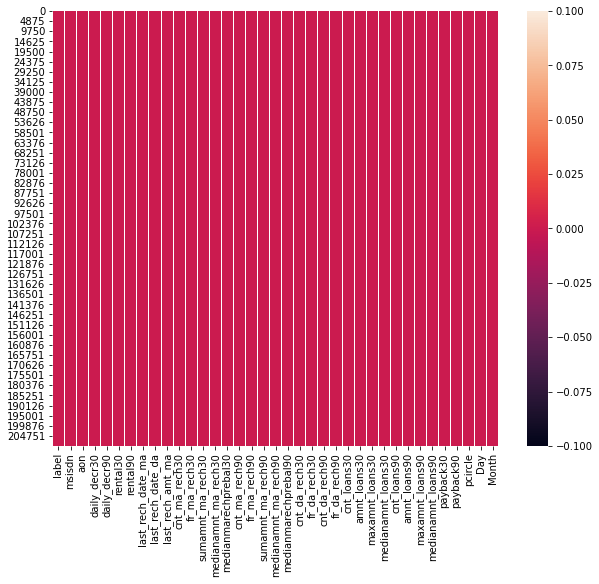

In [ ]:
sns.set_palette('coolwarm')
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())
plt.show()

**No Missing value present in dataset.**

**Yes To Go Further !!!**

### Statistical Matrix

In [ ]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
label,209592.000000,0.875177,0.330519,0.000000,1.000000,1.000000,1.000000,1.000000
aon,209592.000000,8112.380399,75696.261220,-48.000000,246.000000,527.000000,982.000000,999860.755168
daily_decr30,209592.000000,5381.412999,9220.644093,-93.012667,42.439500,1469.091833,7244.096000,265926.000000
daily_decr90,209592.000000,6082.529123,10918.836919,-93.012667,42.691917,1500.000000,7802.795000,320630.000000
rental30,209592.000000,2692.578912,4308.596841,-23737.140000,280.417500,1083.540000,3356.945000,198926.110000
rental90,209592.000000,3483.407309,5770.475034,-24720.580000,300.260000,1334.000000,4201.792500,200148.110000
last_rech_date_ma,209592.000000,3755.865715,53906.020204,-29.000000,1.000000,3.000000,7.000000,998650.377733
last_rech_date_da,209592.000000,3712.220632,53374.960145,-29.000000,0.000000,0.000000,0.000000,999171.809410
last_rech_amt_ma,209592.000000,2064.458973,2370.790003,0.000000,770.000000,1539.000000,2309.000000,55000.000000
cnt_ma_rech30,209592.000000,3.978053,4.256099,0.000000,1.000000,3.000000,5.000000,203.000000


In [ ]:
df.describe(include=object)

,msisdn,pcircle
count,209592,209592
unique,186243,1
top,47819I90840,UPW
freq,7,209592


#### Observation:
- **For all features value of mean is greater than median, indicating skewness in features.**
- **All data belong to year 2016. We can drop year column.**
- **pcircle contain single unique value UPW, so we can drop this feature.**
- **The features aon, daily_decr30, daily_decr90 ,rental30, rental30, last_rech_date_ma, last_rech_date_da, cnt_da_rech30, fr_da_rech30, last_rech_amt_ma, maxamnt_loans30, cnt_loans90, payback30, payback90 contain outliers as there are lot difference in max columns and 75% columns.**
- **aon, daily_decr30, daily_decr90 ,rental30, rental30, last_rech_date_ma, last_rech_date_da, medianmarechprebal90, medianmarechprebal30 features contain negative values in minimum column.**
- **Maximum aon (age on cellular network in days) observed is 999860.755168 and the minimum is -48.**


## Data Cleaning 

**Here we will handle feature containing negative values.**

### aon negative values

In [ ]:
df['aon'].describe()

count    209592.000000
mean       8112.380399
std       75696.261220
min         -48.000000
25%         246.000000
50%         527.000000
75%         982.000000
max      999860.755168
Name: aon, dtype: float64

In [ ]:
999860/365

2739.3424657534247

In [ ]:
df[df['aon']<0].value_counts().sum()

1539

In [ ]:
df[df['aon'] > 3650].value_counts().sum()  # Assume people stay one network for 10 years.

2089

***There are some negative values in minimum column while there is lot of difference between 75% and max column.Max values is 999860days which means 2739.34 year which is not possible at all.***

***There are 1539 entries with value less than 0.***

***So Feature aon contain error. To resolve this error we are going to handle upper limit through outlier removal.***


### There are lot of features which have negative values and higher max value compare to 75 percentile.There is need of some kind common Strategy to handle them based on certain assumption.

### Strategy to handle data error in min and max column.
- **Assumption- All negative values are typing error happen accidentally by type - in front of original value (except feature depicting median).**
    - **Negative values are converted into absolute value to correct negative typing error whenever applicable except feature depicting median.**
    - **Upper limit of these features handle by outlier removal.**

### Now we will convert all negative values into absolute values.

In [ ]:
#Converting all negative values to positive values in above columns
df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['last_rech_date_da']=abs(df['last_rech_date_da'])

**We have successfully converted negative data into positive data.**

### Another data error contain in maxamnt_loans30 column

**maxamnt_loans30** : maximum amount of loan taken by the user in last 30 days

In [ ]:
df['maxamnt_loans30'].describe()

count    209592.000000
mean        274.660029
std        4245.274734
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max       99864.560864
Name: maxamnt_loans30, dtype: float64

**We already know maximum loan amount taken by customers can be 0,5,10 and which can be repay with amount of 0,6,12. We gone replace values greater than 12 into category of zero.**

**<u>We are making assumption here that loan amount greater than 12 to be replace with zero.</u>**

In [ ]:
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0)
       & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0

# marking values greater than 12 and assign value zero to them.

In [ ]:
df['maxamnt_loans30'].value_counts()

6.0     179192
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

### Clearification on negative minimum values in 'medianmarechprebal30' and 'medianmarechprebal90'

**medianmarechprebal90** : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

**medianmarechprebal90** : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- **Comment** :
    - **The median of main account balance can be negative.**
    - **There are some very large positive values in the variable. These could be natural outliers.**

### Clearification on extreme max values in cnt_loans30 & cnt_loans90
**cnt_loans30** : Number of loans taken by user in last 30 days

**cnt_loans90** : Number of loans taken by user in last 90 days

- **Comment**:
    **There are no information about any restrictions on the number of times a customer can avail loans. Hence these extreme values can be considered as realistic.**

### Data is clean and error free now So we will import data in new CSV file and use new CSV file for further investigation.

#### Note :- Outliers will be removed in feature engineering section.

In [ ]:
# Saving error free data to new CSV file with name Clean_data_file
df.to_csv('Clean_data_file.csv',sep=',',index=False)

**Importing Clean_data_file CSV file through pandas**

In [2]:
df=pd.read_csv('Clean_data_file.csv')

In [3]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows : 209592
No. of Columns : 37


,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Day,Month
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20,7
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10,8
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19,8
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22,6


# EDA 

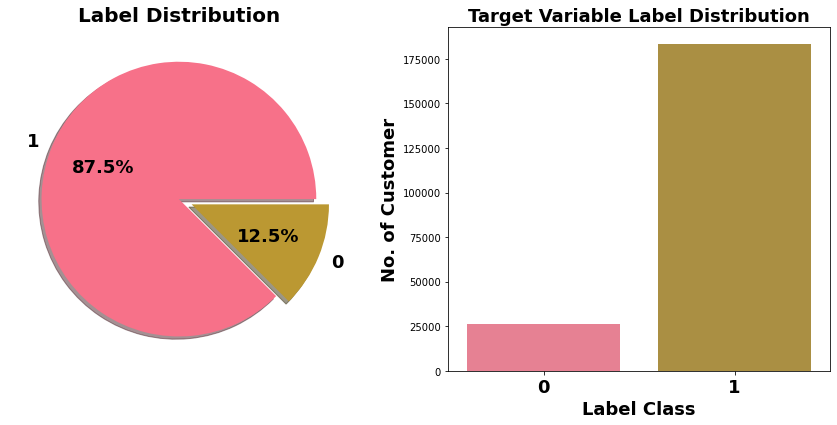

In [62]:
#Counting the number of defaulter and non-defaulter
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(12,6))

df['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Label Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

sns.countplot('label',data=df,ax=ax[1])
ax[1].set_title('Target Variable Label Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Label Class",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Customer",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

- **Label class 1 represent Non-defaulter while Label class 0 represent Defaulter i.e. Loan not paid**
- **We can see Most of customers are Non-defaulter while very few are defaulter.**
- **From ML model building point of view target variable is imbalanced data case.**

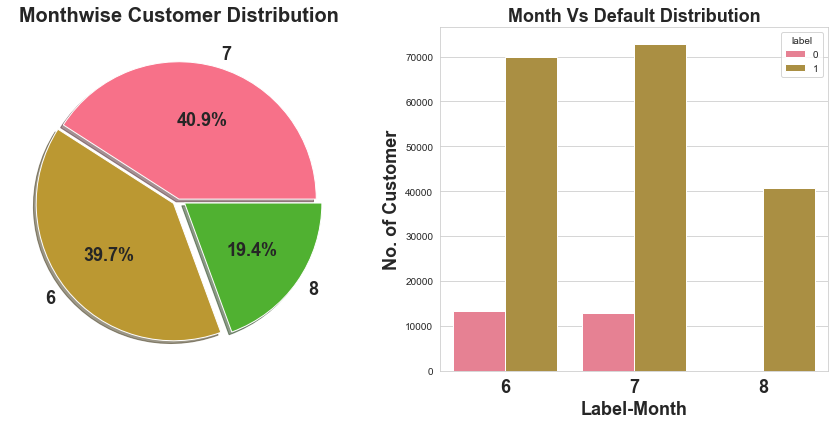

In [96]:
#Counting the number of defaulter and non-defaulter
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(12,6))

df['Month'].value_counts().plot.pie(explode=[0,0.05,0.05],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Monthwise Customer Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

sns.countplot('Month',hue='label',data=df,ax=ax[1])
ax[1].set_title('Month Vs Default Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Label-Month",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Customer",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Comment :

- **Most of data belong to month 6 and 7, followed my month 8.**
- **We can see very few defaulter in month 8.**

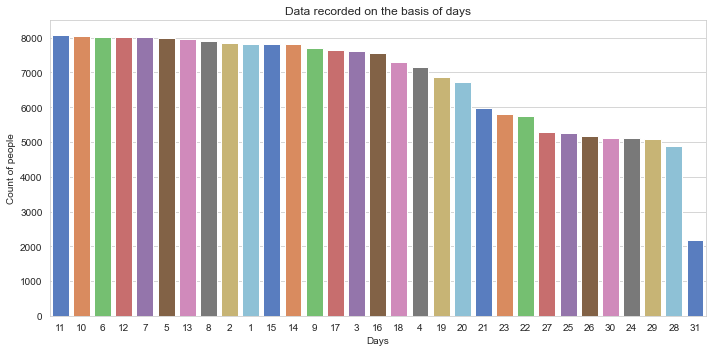

In [65]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(x='Day',data=df,palette='muted',order= df['Day'].value_counts().index)
plt.title('Data recorded on the basis of days')
plt.xlabel('Days')
plt.ylabel('Count of people')
plt.show()

**No significant insight from above plot.**

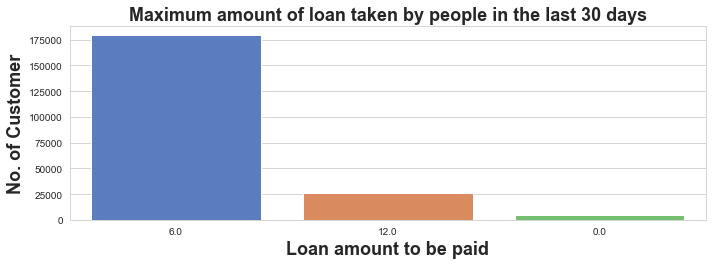

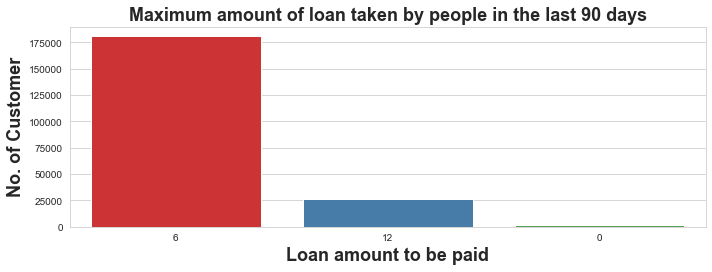

6.0     179192
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64


6     180944
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64


In [98]:
#Maximum amount of loan taken by people in last 30 and 90 days
plt.figure(figsize = (10,10))
plt.subplot(311)
sns.countplot(x='maxamnt_loans30',data=df,palette='muted',order=df['maxamnt_loans30'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Loan amount to be paid',fontsize=18,fontweight ='bold')
plt.ylabel('No. of Customer',fontsize=18,fontweight ='bold')
plt.show()

plt.figure(figsize = (10,10))
plt.subplot(312)
sns.countplot(x='maxamnt_loans90',data=df,palette='Set1',order=df['maxamnt_loans90'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 90 days',fontsize=18,fontweight ='bold')
plt.xlabel('Loan amount to be paid',fontsize=18,fontweight ='bold')
plt.ylabel('No. of Customer',fontsize=18,fontweight ='bold')
plt.show()
print(df['maxamnt_loans30'].value_counts())
print('\n')
print(df['maxamnt_loans90'].value_counts())

#### Observations:

1. In 30 days, maximum number of people had taken 6Rs as the loan amount and the number of people is 179192 whereas the  number of people had not taken loan and their number is 4291.

2. In 90 days, maximum number of people had taken 6Rs as the loan amount and the number of people is 180944 whereas the number of people had not taken loan and their number is 2043.

3. Maximum number of people had taken 12Rs as the loan amount within 90 days and their number is 26605 whereas for 30 days the number of people who had taken 12Rs is 26109 respectively.
**This means customer mostly opt for 6 Rs Loan.**

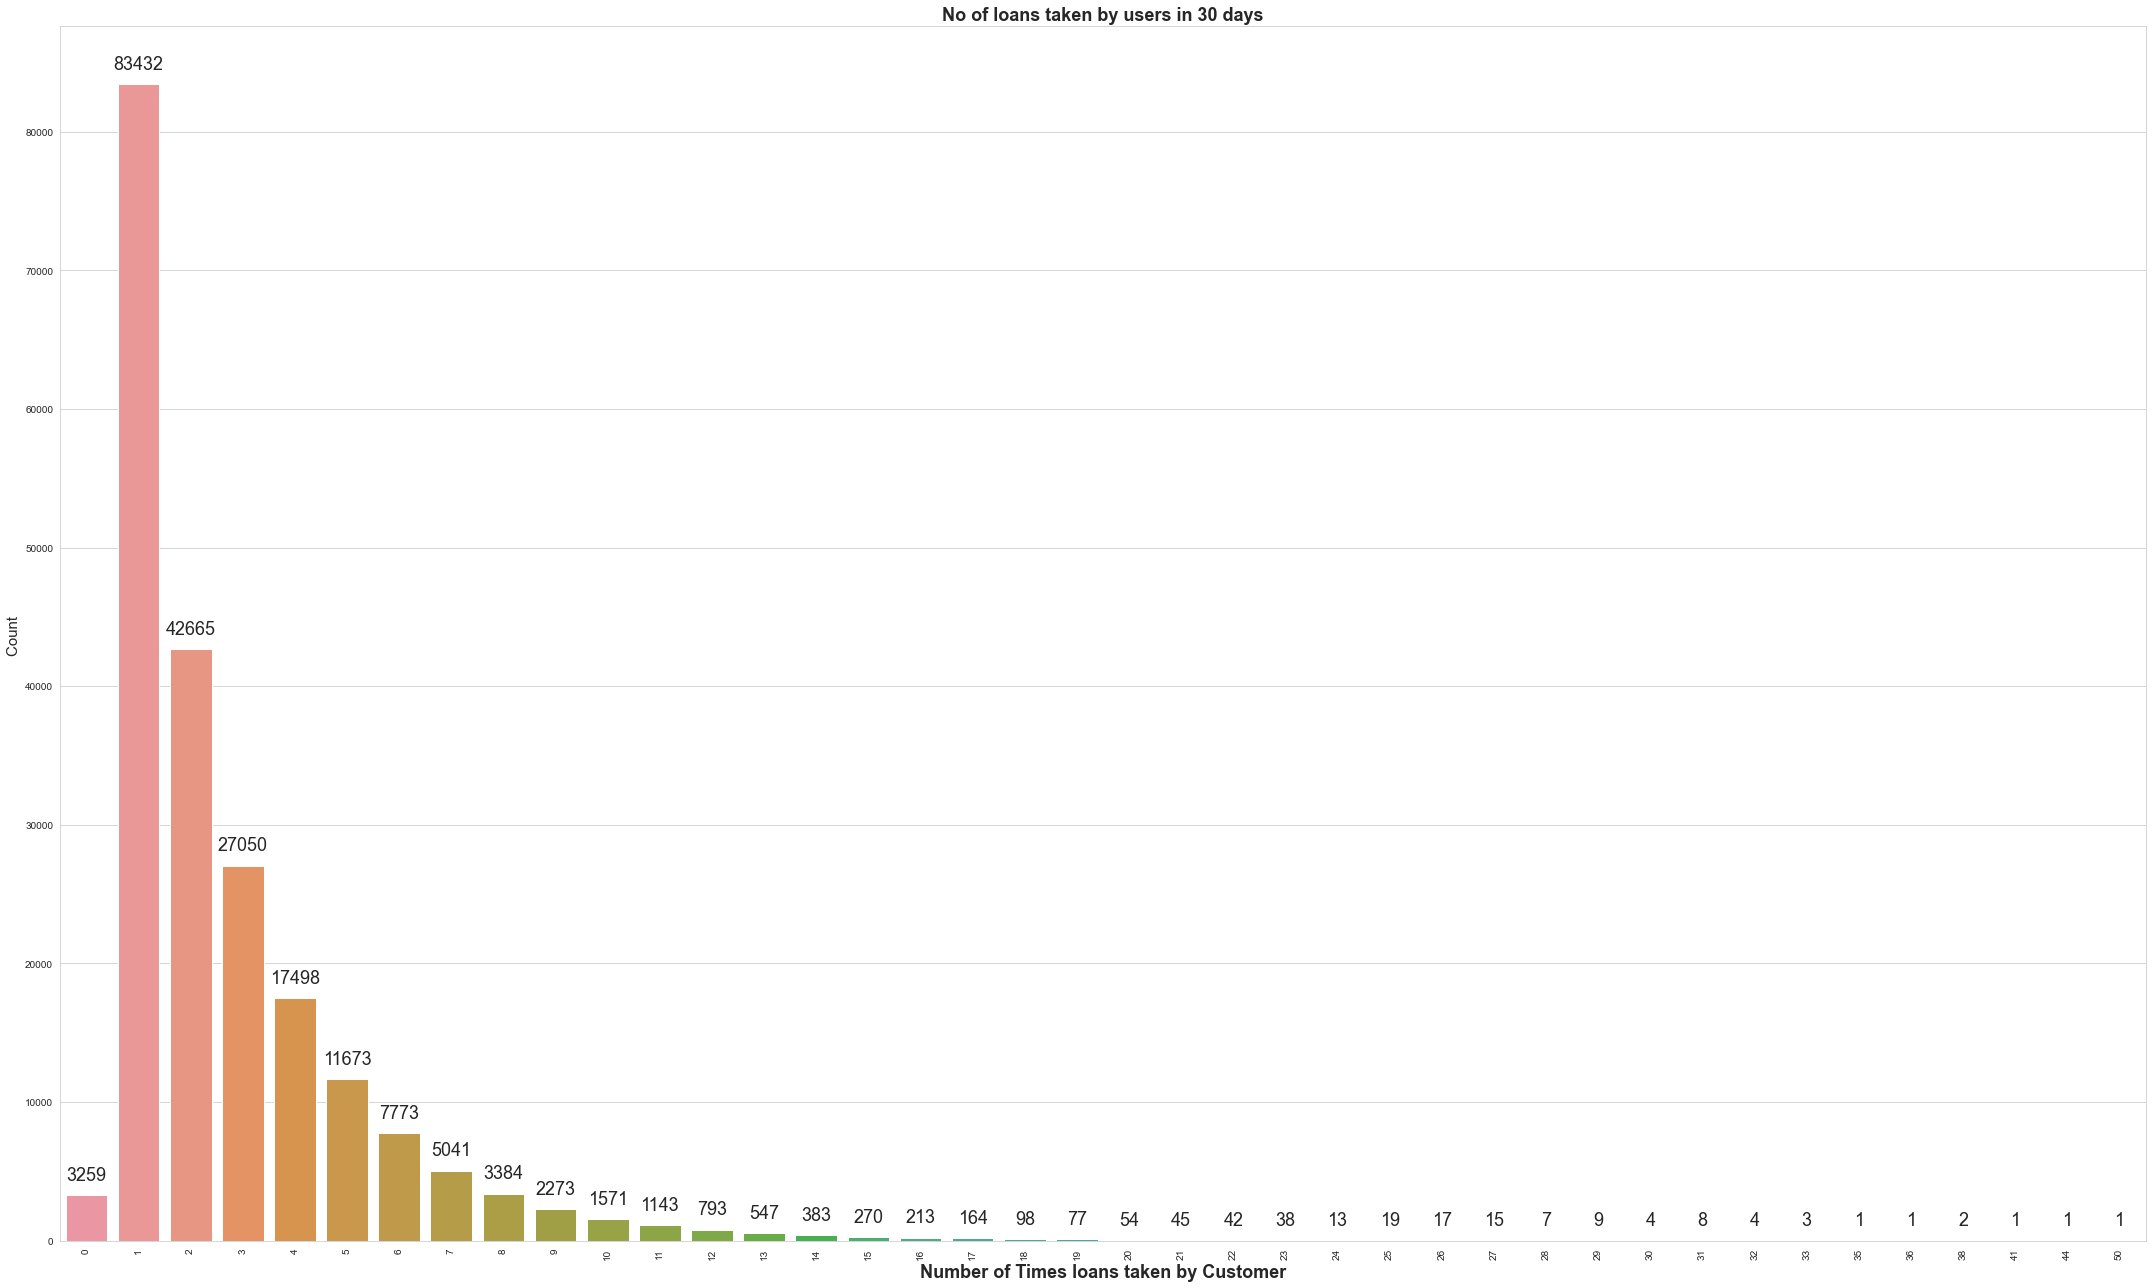

In [75]:
plt.figure(figsize=(30,18))
pd =sns.countplot(x = "cnt_loans30" ,  data=df)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size=18, xytext = (0, 20), textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Number of Times loans taken by Customer",fontsize=18,fontweight ='bold')
plt.ylabel("Count " ,size=15)
plt.title ("No of loans taken by users in 30 days" ,fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()

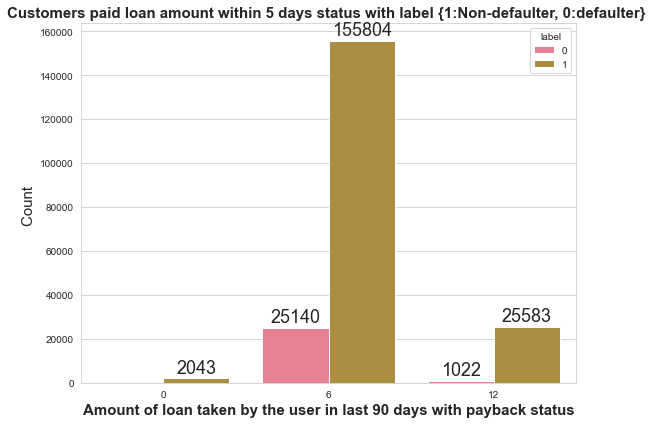

In [100]:
plt.figure(figsize=(8,6))
pd =sns.countplot(x = "maxamnt_loans90" ,  data=df  , hue= 'label')
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size=18, xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Amount of loan taken by the user in last 90 days with payback status",fontsize=15,fontweight ='bold')
plt.ylabel("Count " ,size=15)
plt.title ("Customers paid loan amount within 5 days status with label {1:Non-defaulter, 0:defaulter} "
           ,fontsize=15,fontweight ='bold')
plt.tight_layout()
plt.show()

**Very few defaulter in customers who take loan in amount of 12.**

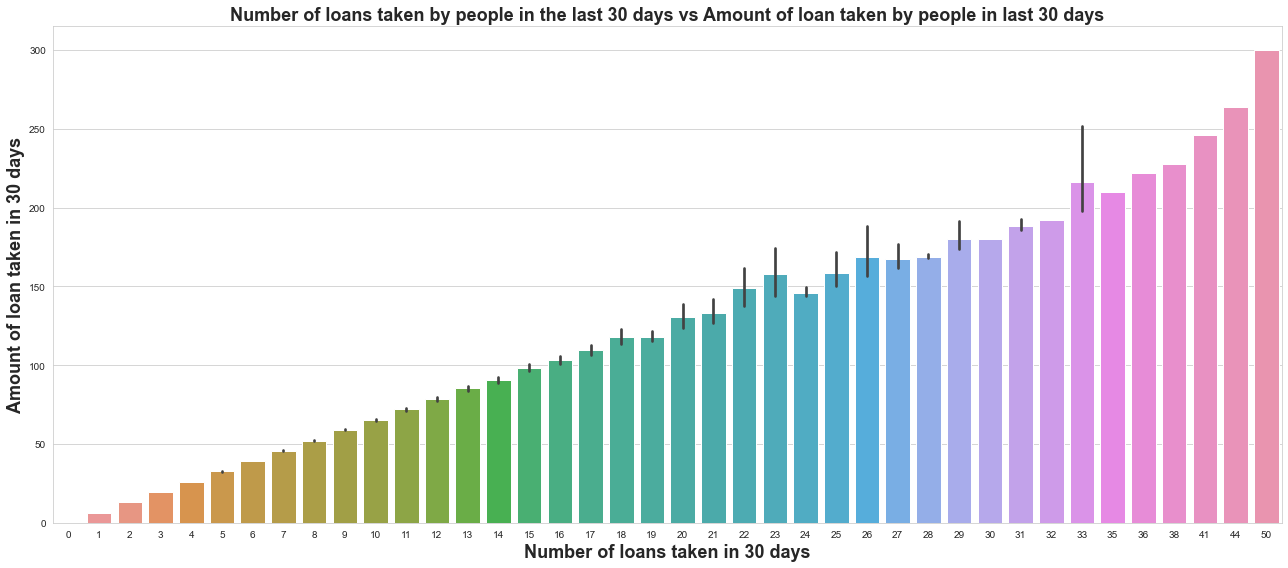

In [84]:
#Checking the number of loans taken by people in last 30 days vs Amount of loan taken by the people in last 90 days.
plt.figure(figsize=(18,8))
sns.barplot(x="cnt_loans30",y='amnt_loans30', data=df)
plt.title('Number of loans taken by people in the last 30 days vs Amount of loan taken by people in last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Number of loans taken in 30 days',fontsize=18,fontweight ='bold')
plt.ylabel('Amount of loan taken in 30 days',fontsize=18,fontweight ='bold')
plt.show()

- **Maximum number of loans taken by the people is 50 and the Average loan amount is equivalent to 300.**

- **Minimum number of loans taken by the people is 0.**

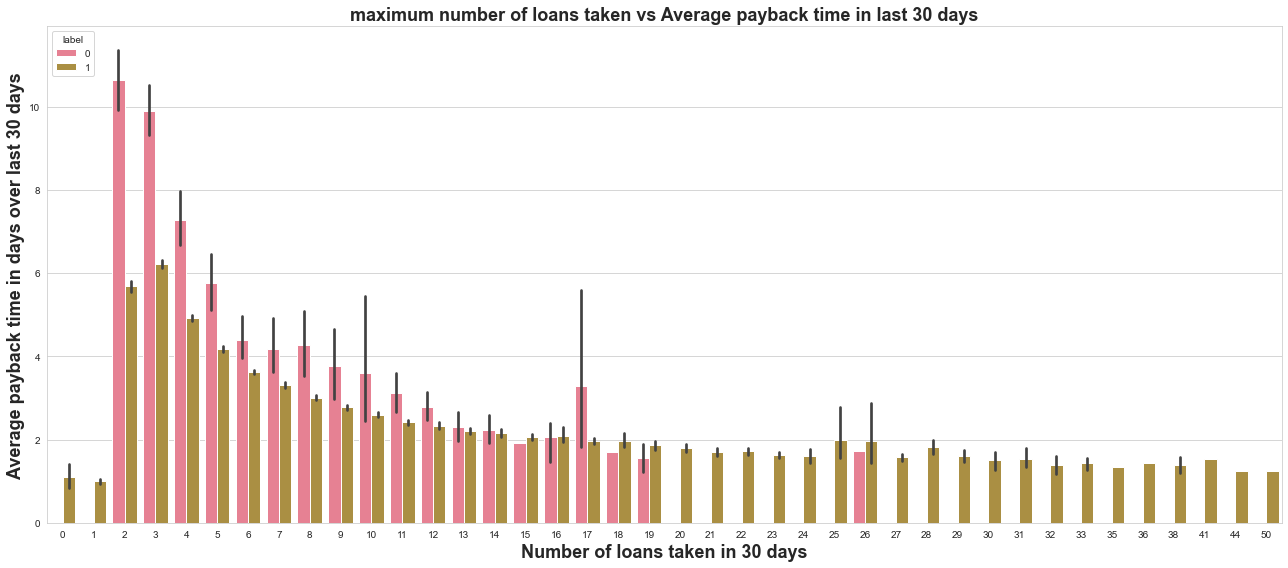

In [85]:
#Checking the maximum number of loans taken vs Amount payed within due dates by people or not on the basis of label
plt.figure(figsize=(18,8))
sns.barplot(x="cnt_loans30",y='payback30',hue='label', data=df)
plt.title('maximum number of loans taken vs Average payback time in last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Number of loans taken in 30 days',fontsize=18,fontweight ='bold')
plt.ylabel('Average payback time in days over last 30 days',fontsize=18,fontweight ='bold')
plt.show()

**We can observe that the Average payback time over last 30 days is higher for people who had taken 2 times the loan and say that the users with less number of loan taking are more than the defaulters**

<Figure size 1080x576 with 0 Axes>

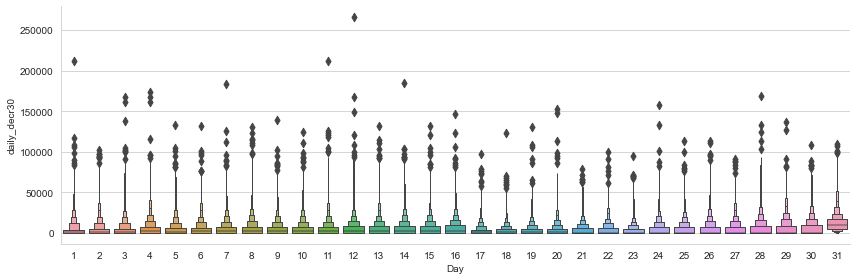

In [88]:
plt.figure(figsize=(15,8))
sns.catplot(y = "daily_decr30", x = "Day", data = df.sort_values("daily_decr30", ascending = False),
            kind="boxen", height = 4, aspect = 3)
plt.show()

# Feature Enginnering

In [4]:
# As we have 37 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'Day', 'Month'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'], object: ['msisdn', 'pcircle']}

In [5]:
#Droping PCircle and msisdn column as they are unnecessary for further investigation
df.drop(['msisdn', 'pcircle'],axis=1,inplace=True)

**As no variable with object datatype is present in database no need for any kind of encoding.**

## 1. Outliers Detection and Removal

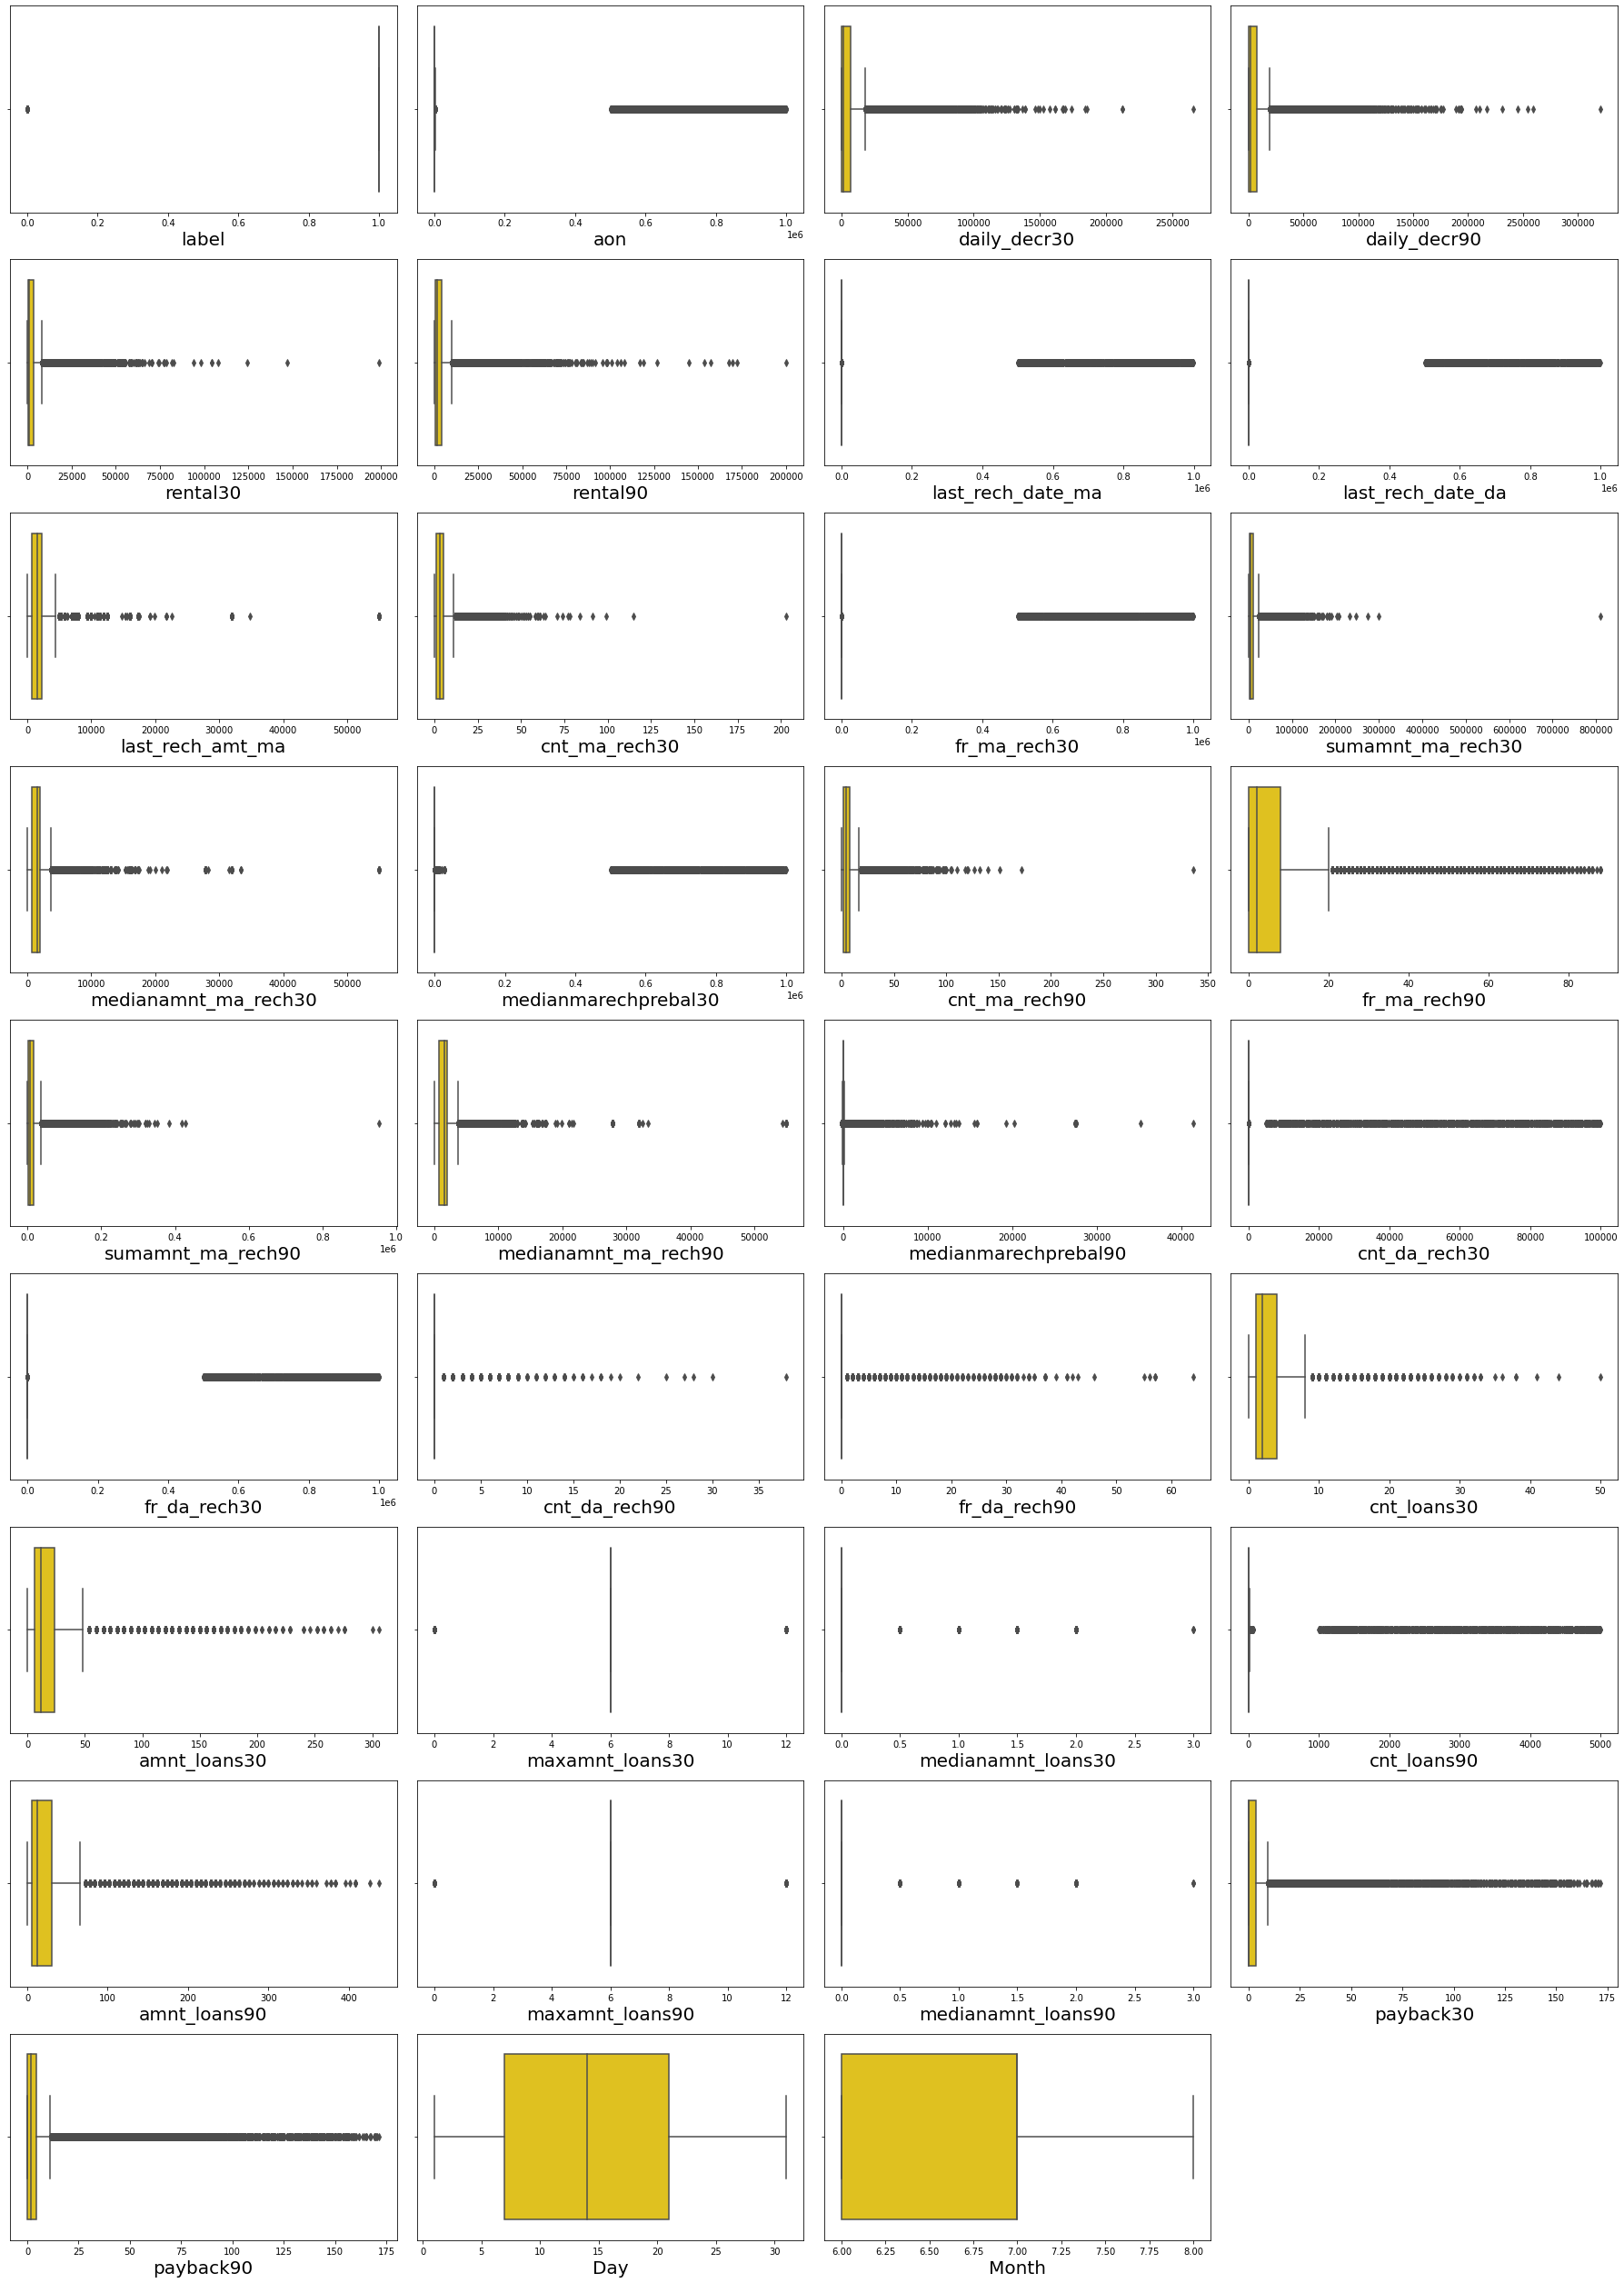

In [64]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

**From Boxplot outliers exist in dataset.**

### Outliers removal using Zscore method

In [65]:
df1=df.copy()

In [66]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df2 = df1[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df1.shape)
print ("Shape of the dataframe after removing outliers: ", df2.shape)
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-df2.shape[0])/df1.shape[0]*100)

df1=df2.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (209592, 35)
Shape of the dataframe after removing outliers:  (160499, 35)
Percentage of data loss post outlier removal:  23.42312683690217


**Huge amount of data loss in Z-score , which is not acceptable**

**Data loss naturally much higher in IQR compare to Z-score**

**AS outliers are present in upper bound,We need to employ some other outliers removal techinque here.**

### Comment :
- **There outliers exist in data.**
- **There are no outliers in lower capping level.**
- **So we will use Quantile-based Flooring and Capping technique.**

### **We will Employ Quantile-based Flooring and Capping technique for outliers removal. In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 75th percentile) for the higher values.**

In [67]:
df.shape

(209592, 35)

#### **In this dataset, we will set the flooring at 0th percentile for lower bound and capping at 99th percentile for upper bound.**

**Upper bound set as 99th percentile as most of values in dataset are realistic but still there are few very extreme values**
**No Outliers in lower bound so Lower bound is set as 0th percentile.**

In [6]:
df1=df.copy()
Q1 = df1.quantile(0)
Q3= df1.quantile(0.99)
IQR = Q3 - Q1
print(IQR)

label                       1.000000
aon                      2419.090000
daily_decr30            41730.620000
daily_decr90            49967.457800
rental30                19466.008500
rental90                26997.976500
last_rech_date_ma          57.000000
last_rech_date_da          56.000000
last_rech_amt_ma        10000.000000
cnt_ma_rech30              20.000000
fr_ma_rech30               26.000000
sumamnt_ma_rech30       46857.620000
medianamnt_ma_rech30    10000.000000
medianmarechprebal30     1531.545000
cnt_ma_rech90              33.000000
fr_ma_rech90               54.000000
sumamnt_ma_rech90       78717.270000
medianamnt_ma_rech90    10000.000000
medianmarechprebal90     1040.199700
cnt_da_rech30               1.000000
fr_da_rech30                0.000000
cnt_da_rech90               1.000000
fr_da_rech90                0.000000
cnt_loans30                12.000000
amnt_loans30               84.000000
maxamnt_loans30            12.000000
medianamnt_loans30          1.000000
c

In [7]:
data = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(198174, 35)


##### Data Loss

In [8]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((209592-198174)/209592)*100,'%')

Percentage Data Loss : 5.447727012481392 %


**We have 5.44% of data Loss with Quantile-based Flooring and Capping Method which is within acceptable range.**

Since outliers are removed we can move further

## 2. Skewness of features

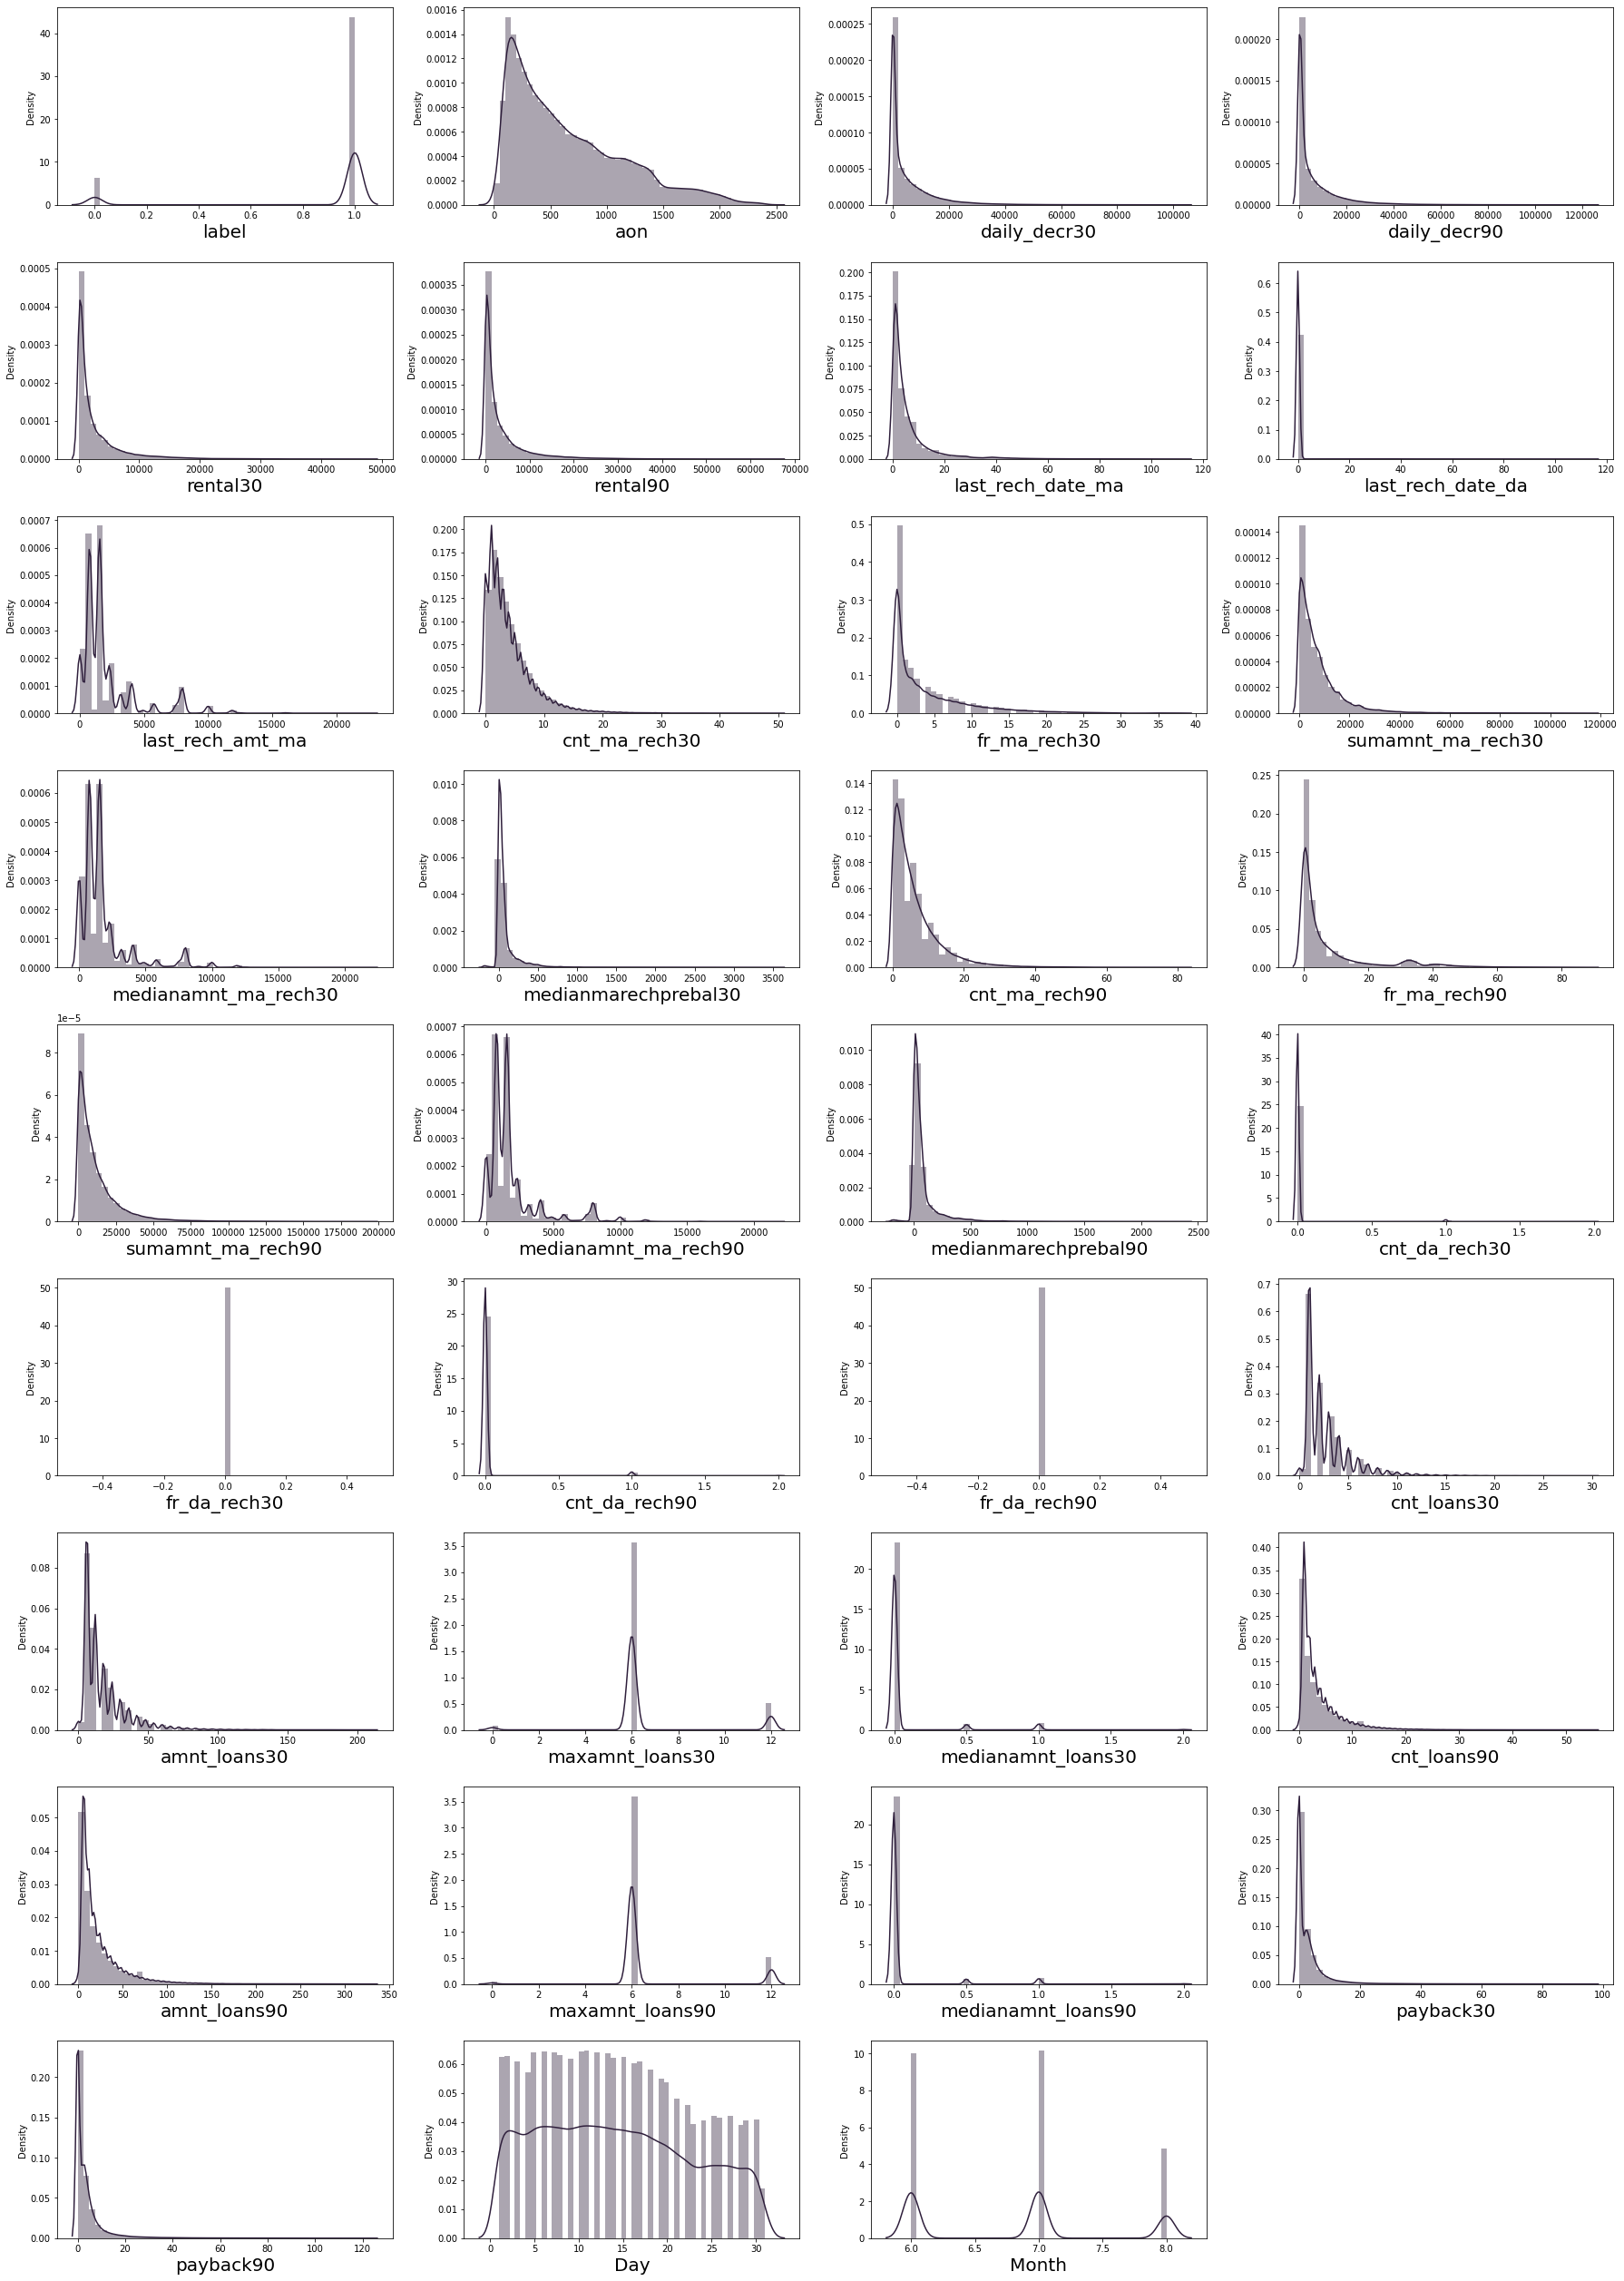

In [71]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
sns.set_palette('mako')
for column in data:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [11]:
data.skew()

label                   -2.271908
aon                      0.953359
daily_decr30             3.105440
daily_decr90             3.271934
rental30                 3.099030
rental90                 3.254858
last_rech_date_ma        3.474759
last_rech_date_da       10.002349
last_rech_amt_ma         2.299548
cnt_ma_rech30            2.353904
fr_ma_rech30             2.022702
sumamnt_ma_rech30        3.126539
medianamnt_ma_rech30     2.511191
medianmarechprebal30     6.367321
cnt_ma_rech90            2.583006
fr_ma_rech90             2.282754
sumamnt_ma_rech90        3.170519
medianamnt_ma_rech90     2.528494
medianmarechprebal90     5.600052
cnt_da_rech30           10.650435
fr_da_rech30             0.000000
cnt_da_rech90            7.349590
fr_da_rech90             0.000000
cnt_loans30              2.502413
amnt_loans30             2.643728
maxamnt_loans30          1.248748
medianamnt_loans30       4.534407
cnt_loans90              2.797465
amnt_loans90             2.876427
maxamnt_loans9

In [12]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Day', 'Month'],
      dtype='object')

In [9]:
# Droping unncessary column
data.drop(['fr_da_rech30'],axis=1,inplace=True)

In [10]:
# Droping unncessary column
data.drop(['fr_da_rech90'],axis=1,inplace=True)

**All features are skew except few one like day, month, fr_da_rech90,fr_da_rech30.**

**We will use PowerTransformer to transform skewness in features.**

**We will not perform on label as it is our Target Variable.**

In [11]:
skew_fea=['aon','daily_decr30', 'daily_decr90', 'rental30','rental90','last_rech_date_ma', 'last_rech_date_da',
          'last_rech_amt_ma','cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30','medianamnt_ma_rech30', 
          'medianmarechprebal30', 'cnt_ma_rech90','fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
          'medianmarechprebal90', 'cnt_da_rech30','cnt_da_rech90', 'cnt_loans30', 'amnt_loans30',
          'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
          'maxamnt_loans90','medianamnt_loans90', 'payback30', 'payback90']

In [12]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [13]:
data[skew_fea] = scaler.fit_transform(data[skew_fea].values)

In [14]:
data.skew()

label                  -2.271908
aon                    -0.056858
daily_decr30           -0.130882
daily_decr90           -0.120816
rental30               -0.044562
rental90               -0.044552
last_rech_date_ma       0.041791
last_rech_date_da       6.421015
last_rech_amt_ma       -0.083886
cnt_ma_rech30          -0.001233
fr_ma_rech30            0.136359
sumamnt_ma_rech30      -0.314228
medianamnt_ma_rech30   -0.206002
medianmarechprebal30    1.286913
cnt_ma_rech90          -0.003740
fr_ma_rech90            0.143563
sumamnt_ma_rech90      -0.214062
medianamnt_ma_rech90   -0.066142
medianmarechprebal90    1.464515
cnt_da_rech30           9.681389
cnt_da_rech90           6.688823
cnt_loans30             0.036997
amnt_loans30            0.002737
maxamnt_loans30         0.427387
medianamnt_loans30      3.452247
cnt_loans90             0.097595
amnt_loans90           -0.008161
maxamnt_loans90         0.367231
medianamnt_loans90      3.782959
payback30               0.296427
payback90 

**Skewness of most of features is reduced.**

## 3. Corrleation

In [80]:
data.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
label,1.000000,0.102185,0.268143,0.270628,0.144527,0.159672,0.067789,0.027738,0.263310,0.345216,0.245368,0.358906,0.279250,0.130770,0.362887,0.221343,0.368844,0.254778,0.120481,0.015630,0.024407,0.234153,0.232136,0.061452,0.046535,0.269459,0.263466,0.069272,0.036254,0.234465,0.242820,0.007953,0.155283
aon,0.102185,1.000000,0.118006,0.118686,0.084513,0.092395,0.066388,0.009568,0.099651,0.040823,0.073256,0.082927,0.099293,0.021882,0.062546,0.077413,0.101138,0.105037,0.017935,0.012723,0.020968,0.078081,0.078428,0.034012,-0.002303,0.118780,0.117056,0.040877,-0.009895,0.083223,0.113250,0.016157,0.086860
daily_decr30,0.268143,0.118006,1.000000,0.998269,0.581151,0.637900,0.127039,0.052008,0.377756,0.496305,0.300047,0.555073,0.389906,0.120044,0.627472,0.221856,0.664010,0.367207,0.081629,-0.000255,0.043670,0.340419,0.392257,0.297801,0.008698,0.494980,0.524457,0.320128,-0.029339,0.329613,0.405428,-0.011256,0.816988
daily_decr90,0.270628,0.118686,0.998269,1.000000,0.581397,0.643209,0.131239,0.052159,0.377242,0.491612,0.299273,0.549521,0.386693,0.120065,0.631170,0.223051,0.667071,0.367462,0.081748,-0.001195,0.043415,0.333662,0.386101,0.296596,0.010347,0.495488,0.525144,0.320650,-0.028993,0.327047,0.406148,-0.018626,0.830654
rental30,0.144527,0.084513,0.581151,0.581397,1.000000,0.973215,0.056552,0.016728,0.284149,0.455258,0.252911,0.479516,0.321719,0.078340,0.510499,0.165101,0.516842,0.271904,0.039384,0.012333,0.010556,0.309876,0.338572,0.206974,-0.023155,0.401671,0.415104,0.221842,-0.050595,0.308995,0.344320,0.097868,0.414943
rental90,0.159672,0.092395,0.637900,0.643209,0.973215,1.000000,0.090960,0.023879,0.295631,0.446775,0.255100,0.468402,0.313563,0.078791,0.538760,0.178968,0.543064,0.282979,0.042660,0.006754,0.016224,0.293081,0.326468,0.214027,-0.017917,0.415439,0.430637,0.233830,-0.050120,0.305906,0.361306,0.080144,0.503142
last_rech_date_ma,0.067789,0.066388,0.127039,0.131239,0.056552,0.090960,1.000000,0.033928,0.526551,-0.014356,0.061811,0.117979,0.328460,0.082517,0.104523,0.220981,0.256562,0.515492,0.130362,0.013824,0.033080,-0.105280,-0.107254,-0.021382,0.032966,-0.046265,-0.053897,-0.013516,0.026746,-0.097832,-0.025157,0.030724,0.078007
last_rech_date_da,0.027738,0.009568,0.052008,0.052159,0.016728,0.023879,0.033928,1.000000,0.025375,0.004672,0.015869,0.012854,0.019461,0.027098,0.010301,0.020499,0.019482,0.024997,0.031467,0.671517,0.961435,0.000568,0.003634,0.016645,0.007179,0.004689,0.006235,0.017424,0.004807,0.006217,0.023803,0.029240,0.037719
last_rech_amt_ma,0.263310,0.099651,0.377756,0.377242,0.284149,0.295631,0.526551,0.025375,1.000000,0.326669,0.278042,0.654749,0.813790,0.214699,0.378529,0.340054,0.703895,0.904356,0.230567,0.009298,0.023921,0.146048,0.163878,0.130927,0.036199,0.195120,0.201801,0.143433,0.023744,0.147000,0.184039,0.057157,0.154091
cnt_ma_rech30,0.345216,0.040823,0.496305,0.491612,0.455258,0.446775,-0.014356,0.004672,0.326669,1.000000,0.426293,0.858889,0.420180,0.147155,0.921499,0.226083,0.780084,0.292473,0.096232,-0.008775,0.002069,0.698560,0.693440,0.178294,-0.047779,0.694786,0.686595,0.183055,-0.062256,0.546146,0.491135,0.097414,0.191404


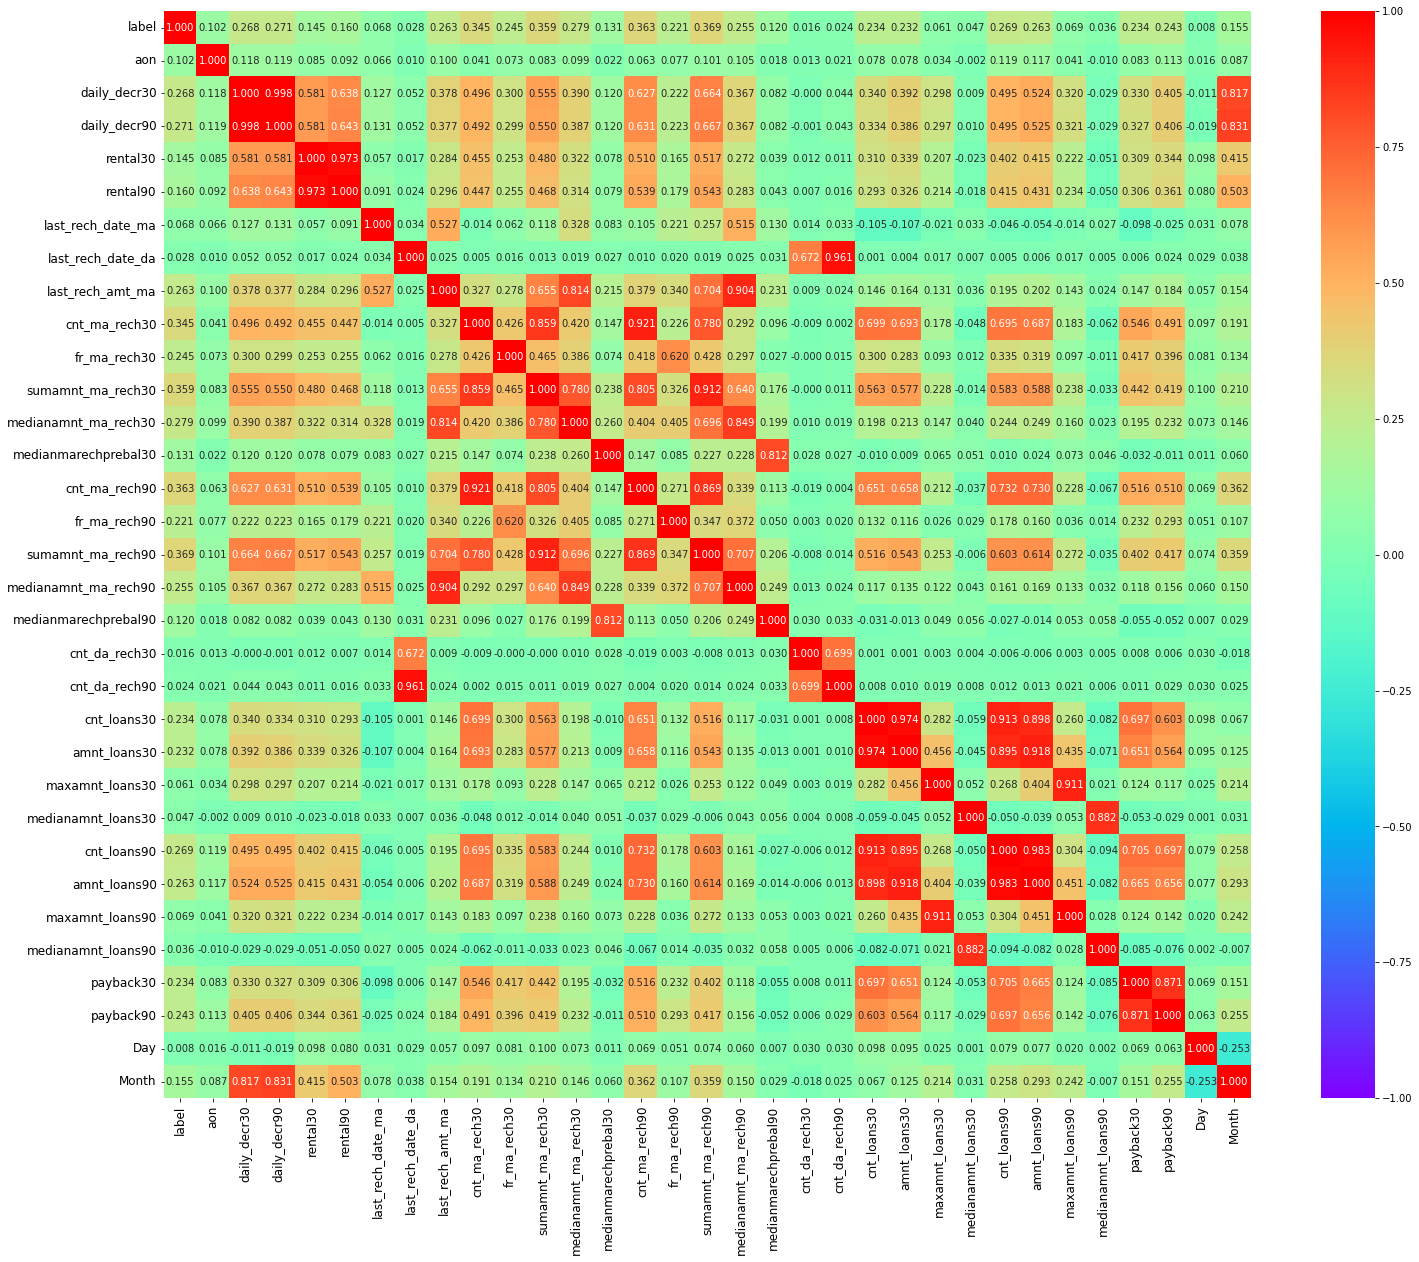

In [81]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="rainbow")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

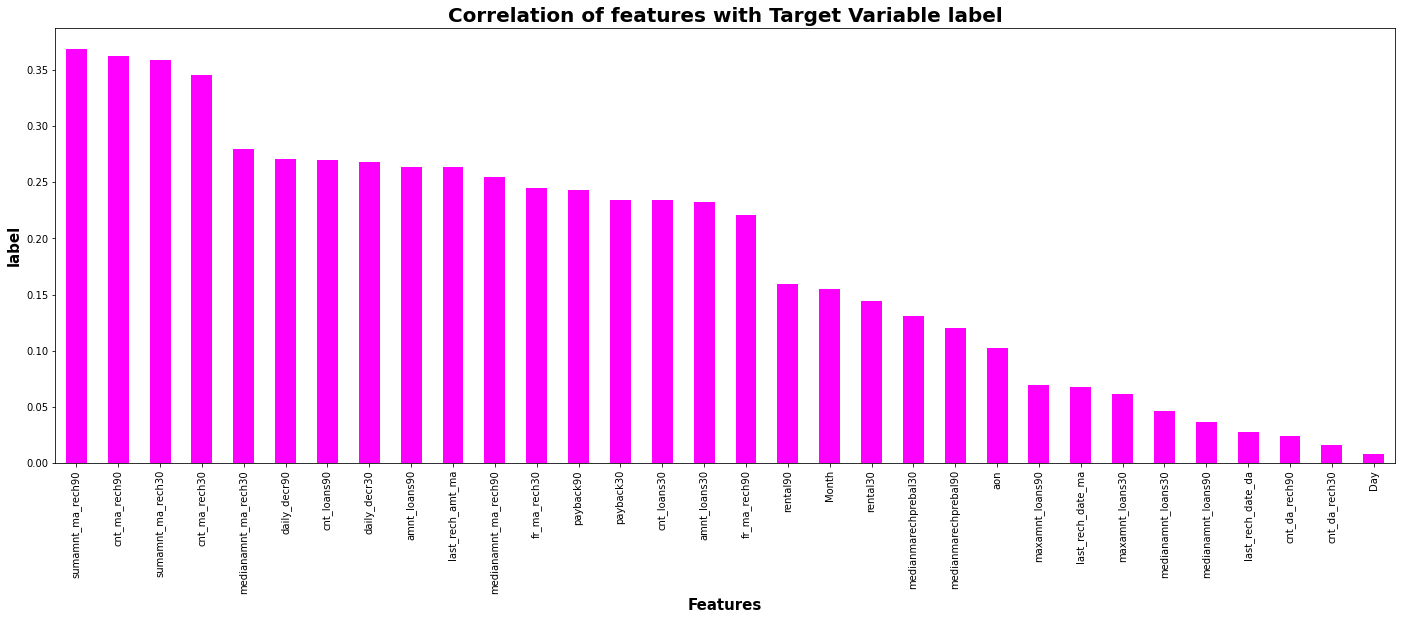

In [82]:
plt.figure(figsize = (24,8))
data.corr()['label'].drop(['label']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('label',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable label',fontsize = 20,fontweight='bold')
plt.show()

## 5. Standard Scaling

In [15]:
# Splitting data in target and dependent feature
X = data.drop(['label'], axis =1)
Y = data['label']

In [16]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## 4. Balanceing Imbalanced target feature

In [17]:
data.label.value_counts()

1    173461
0     24713
Name: label, dtype: int64

<b> As Target variable data is Imbalanced in nature we will need to balance target variable.</b>

### Balancing using SMOTE

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
data.shape

(198174, 33)

In [20]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X_scale, Y = oversample.fit_resample(X_scale, Y)

In [21]:
Y.value_counts()

1    173461
0    173461
Name: label, dtype: int64

**We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.**

## 6. Checking Multicollinearity between features using variance_inflation_factor

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

#### Observation :
- **daily_decr30 and daily_decr90 are highly correlated with each other.**
- **cnt_loans90 and amnt_loans90 are highly correlated with each other.**
- **cnt_loans30 and amnt_loans30 are highly correlated with each other.**
- **cnt_ma_rech30 and sumamnt_ma_rech30 are highly correlated with each other.**

#### Strategy to Address Multicollinearity :
1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
2. Another way to address Multicollinerity is to Scaled Data and then apply PCA.

<b> We will go by Second way for further investigation. As For most Independent feature VIF is exceed permissible limit of 10. </b>


## 7. PCA

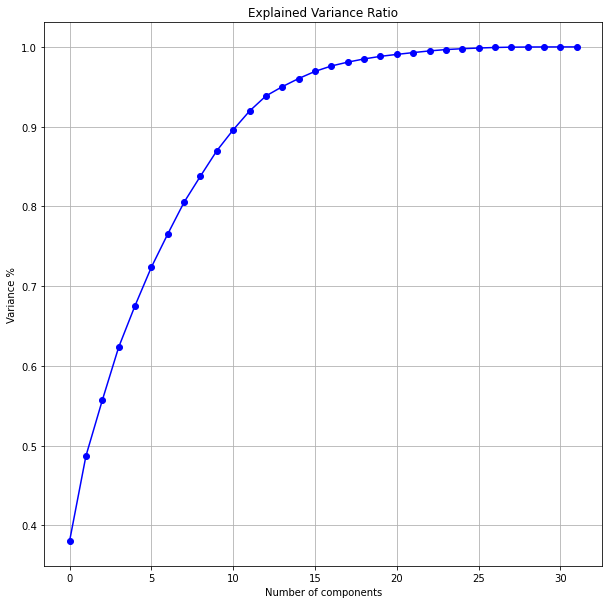

In [23]:
#plot the graph to find the principal components
from sklearn.decomposition import PCA
pca =PCA()
x_pca =pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Variance %')
plt.title('Explained Variance Ratio')
plt.grid()
plt.show()

#### Comment -
<b> AS per the graph, we can see that 12 principal components attribute for 90% of variation in the data.  We shall pick the first 12 components for our prediction. </b>

In [24]:
pca_new = PCA(n_components=11)
x_new = pca_new.fit_transform(X_scale)

In [25]:
principle_x=pd.DataFrame(x_new,columns=np.arange(11))

# Machine Learning Model Building

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (232437, 11)
Training target vector size: (232437,)
Test feature matrix size: (114485, 11)
Test target vector size: (114485,)


## 1.  Logistic Regression

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=62, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.76250163776914


Confusion matrix of Logistics Regression : 
 [[43568 13522]
 [13668 43727]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.76      0.76      0.76     57090
           1       0.76      0.76      0.76     57395

    accuracy                           0.76    114485
   macro avg       0.76      0.76      0.76    114485
weighted avg       0.76      0.76      0.76    114485



#### Cross Validation of Logistics Regression

In [40]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, principle_x, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.76029401 0.76163436 0.76289923 0.76265421 0.76438372]
Mean CV Score : 0.7623731063981014
Std deviation : 0.0013613796672301392


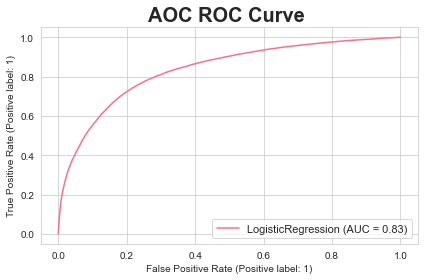

Auc Score :
 0.7625033496170385


In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(log_reg,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, log_reg.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## 2. Decision Tree Classifier

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=62, test_size=.33)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.8528628204568284


Confusion matrix of Decision Tree Classifier : 
 [[49859  7231]
 [ 9614 47781]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86     57090
           1       0.87      0.83      0.85     57395

    accuracy                           0.85    114485
   macro avg       0.85      0.85      0.85    114485
weighted avg       0.85      0.85      0.85    114485



#### Cross Validation of Decision Tree Classifier

In [33]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, principle_x, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.86655617 0.86360164 0.863052   0.86313848 0.86211519]
Mean CV Score : 0.8636926952674534
Std deviation : 0.0015108922916118022


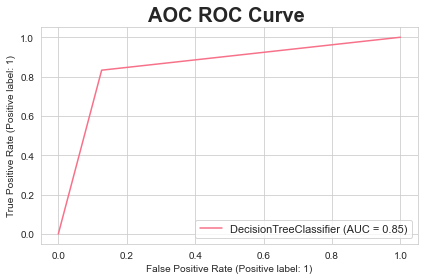

Auc Score :
 0.852917229755583


In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dtc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, dtc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## 3. Random Forest Classifier 

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=62, test_size=.33)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier Evaluation


Accuracy Score of Random Forest Classifier : 0.9188976721841289


Confusion matrix of Random Forest Classifier : 
 [[53262  3828]
 [ 5457 51938]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     57090
           1       0.93      0.90      0.92     57395

    accuracy                           0.92    114485
   macro avg       0.92      0.92      0.92    114485
weighted avg       0.92      0.92      0.92    114485



 #### Cross Validation Random Forest Classifier

In [37]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, principle_x, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.9241767  0.92854363 0.926006   0.92648161 0.92504036]
Mean CV Score : 0.926049657787592
Std deviation : 0.0014788565435022586


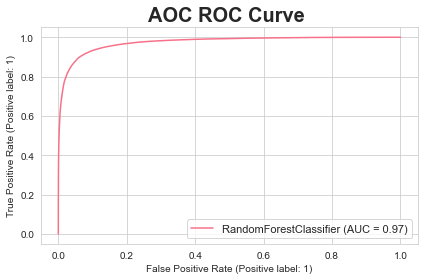

Auc Score :
 0.9189350042072305


In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(rfc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, rfc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## 4. Extra Tree Classifier

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=62, test_size=.33)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'Extra Trees Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Extra Trees Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Extra Trees Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Extra Trees Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Extra Trees Classifier Evaluation


Accuracy Score of Extra Trees Classifier : 0.9334323273791326


Confusion matrix of Extra Trees Classifier : 
 [[54082  3008]
 [ 4613 52782]]


classification Report of Extra Trees Classifier 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93     57090
           1       0.95      0.92      0.93     57395

    accuracy                           0.93    114485
   macro avg       0.93      0.93      0.93    114485
weighted avg       0.93      0.93      0.93    114485



#### Cross Validation Extra Tree Classifier

In [104]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(etc, principle_x, Y, cv =5)
print('\033[1m'+'Cross Validation Score', etc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score ExtraTreesClassifier() :

CVScore : [0.94216329 0.94111119 0.94007264 0.93992851 0.9408365 ]
Mean CV Score : 0.9408224280108296
Std deviation : 0.0008053277374174257


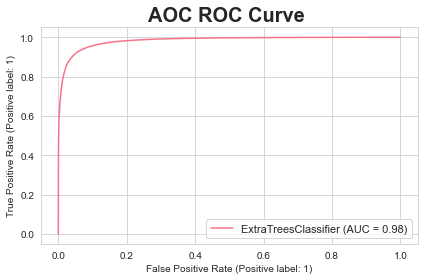

Auc Score :
 0.9338186903816424


In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(etc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, etc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

**Extra Tree classifier gives maximum accuracy and cross validation score.**

## Hyper Parameter Tuning

In [105]:
from sklearn.model_selection import GridSearchCV

In [109]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'] }

In [110]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 1/5; 1/6] END criterion=gini, max_features=auto;, score=0.923 total time=  24.8s
[CV 2/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 2/5; 1/6] END criterion=gini, max_features=auto;, score=0.924 total time=  24.6s
[CV 3/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 3/5; 1/6] END criterion=gini, max_features=auto;, score=0.927 total time=  24.8s
[CV 4/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 4/5; 1/6] END criterion=gini, max_features=auto;, score=0.925 total time=  24.8s
[CV 5/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 1/5; 2/6] END criterion=gini, max_features=sqrt;, score=0.924 total time=  24.7s
[CV 2/5; 2/6] START criterion=gini, max_features=sqrt...........................
[CV 2/5; 2/6] END criterion=g

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=10)

In [111]:
GCV.best_params_

{'criterion': 'gini', 'max_features': 'auto'}

## Extra Tree Classifier model based on Hyper Parameter Tuning

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=62, test_size=.33)
etc=ExtraTreesClassifier(criterion='gini', max_features = 'auto')
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'Extra Trees Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Extra Trees Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Extra Trees Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Extra Trees Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Extra Trees Classifier Evaluation


Accuracy Score of Extra Trees Classifier : 0.9345853168537362


Confusion matrix of Extra Trees Classifier : 
 [[54213  2877]
 [ 4612 52783]]


classification Report of Extra Trees Classifier 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94     57090
           1       0.95      0.92      0.93     57395

    accuracy                           0.93    114485
   macro avg       0.93      0.93      0.93    114485
weighted avg       0.93      0.93      0.93    114485



**We can see that hyper parameter tuning leads to increase in accuracy compare to default parameter from 0.9434 to 0.9445 . We will use New Extra tree classifer model final model.**

In [29]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(etc, principle_x, Y, cv =5)
print('\033[1m'+'Cross Validation Score', etc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score ExtraTreesClassifier() :

CVScore : [0.94343158 0.94102472 0.93962585 0.94043295 0.94089415]
Mean CV Score : 0.941081850408467
Std deviation : 0.0012728484101100725


## Final Model AOC ROC

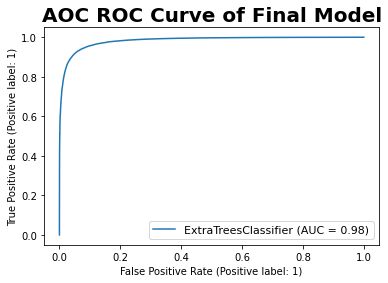

Auc Score :
 0.9338186903816424


In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(etc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, etc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## Saving Final Model

In [46]:
import joblib
joblib.dump(etc,'Micro_Credit_Defaulter_Final.pkl')

['Micro_Credit_Defaulter_Final.pkl']

## Prediction Using Final Model

In [47]:
# Prediction
prediction = etc.predict(X_test)

In [54]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred

,Predicted Values,Actual Values
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
114480,0,0
114481,0,0
114482,1,1
114483,1,1
